In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import pylab as pl
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [62]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

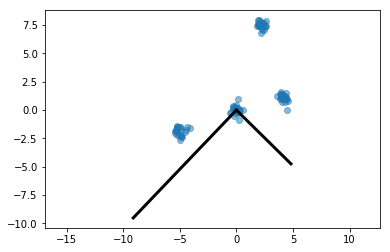

In [63]:
X = data1.as_matrix()
pca = PCA(2)
pca.fit(X)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

#### Based on the plot we can have 4 clusters

In [64]:

print("variance explained via the first and second components:{}\n".format(pca.explained_variance_))
print("principal components:\n{}".format(pca.components_))

variance explained via the first and second components:[ 26.41004752   5.09112141]

principal components:
[[-0.59096891 -0.61780358 -0.3031117  -0.2994631  -0.29583717]
 [ 0.71205013 -0.70166526  0.01295789  0.00988721  0.01961646]]


### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

In [65]:
#Use package from sklearn.

n=4
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
res=KM.fit(dd)
KM.fit(data1.iloc[:,:-1])
res_KM=KM.predict(data1.iloc[:,:-1])
print(res_KM)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

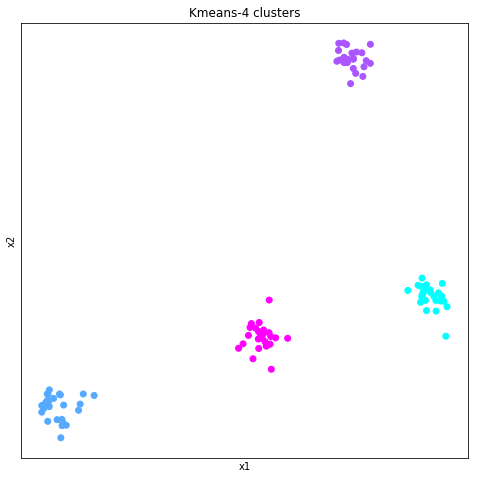

In [66]:
dd=X
pl.figure(figsize=(8,8))
pl.scatter(dd[:, 0], dd[:, 1], c=res_KM, cmap=plt.cm.cool)
pl.xlabel('x1')
pl.ylabel('x2')
pl.xticks(())
pl.yticks(())
pl.title("Kmeans-{} clusters".format(n))
pl.show()

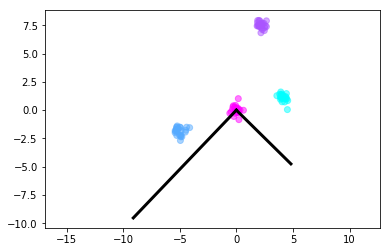

In [13]:
#plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_)
#plt.xlabel('First eigenvector')
#plt.ylabel('Second eigenvector')
#plt.legend()
#plt.show()

X = data1.as_matrix()
pca = PCA(2)
pca.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=res.labels_,cmap=plt.cm.cool, alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

In [14]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = pl.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        pl.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        pl.show()

For n_clusters = 2 The average silhouette_score is : 0.577195417571


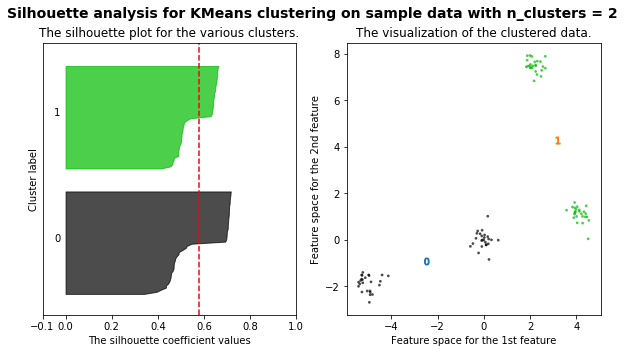

For n_clusters = 3 The average silhouette_score is : 0.729751656133


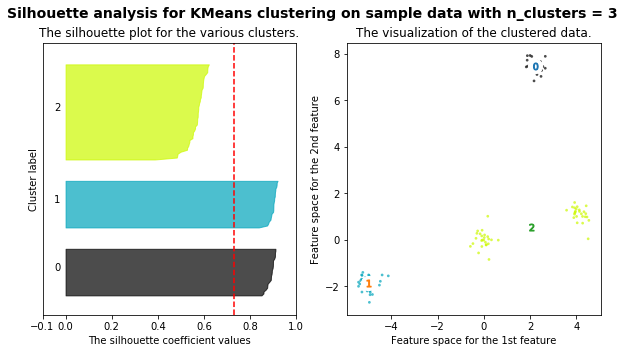

For n_clusters = 4 The average silhouette_score is : 0.843535323032


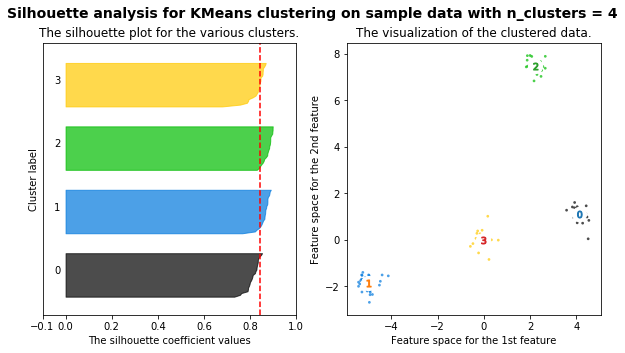

In [15]:
silhouette_score_plot(X,(2,3,4))

In [16]:


def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = pl.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    pl.grid(True)
    pl.xlabel('Number of clusters')
    pl.ylabel('Average within-cluster sum of squares')
    pl.title('Elbow for KMeans clustering')
    pl.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = pl.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    pl.grid(True)
    pl.xlabel('Number of clusters')
    pl.ylabel('Percentage of variance explained')
    pl.title('Elbow for KMeans clustering')
    pl.show()

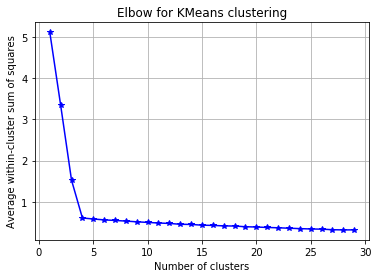

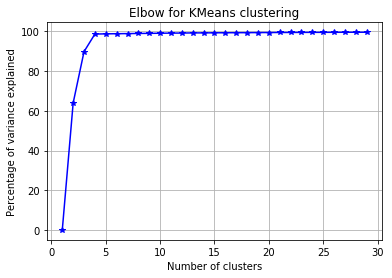

In [17]:
elbow(X, range(1,30))

#### from both the methods we get number of clusters as 4

### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [18]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

In [19]:
import sklearn
sklearn.__version__

'0.19.0'

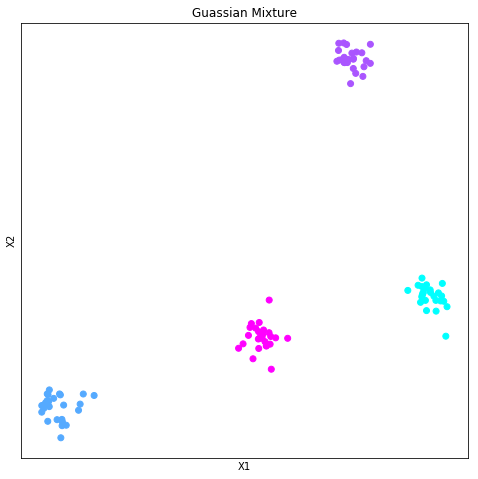

In [21]:
pl.figure(figsize=(8,8))
pl.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
pl.xlabel('X1')
pl.ylabel('X2')
pl.xticks(())
pl.yticks(())
pl.title("Guassian Mixture")

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [42]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


In [43]:
data2.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)

In [45]:
data2_fac = data2.apply(lambda x: pd.factorize(x)[0])
data2_fac.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,2,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,4,1,1,1,0,0


In [67]:
data2_fac = data2_fac[['UNIQUE KEY']]
X = data2_fac.as_matrix()
#apply clustering
rr=KMeans(n_clusters=620).fit(pd.DataFrame(X))
rr

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=620, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
n=620
# Guassian Mixture:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=n)
GM.fit(data2_fac.iloc[:])
res_Mix=GM.predict(data2_fac.iloc[:])
len(np.unique(res_Mix))

617

##### Explanation
I took the dataset and factorized the data to store it in a new df data2_fac. Later I convert the data to matrix and run KMeans on it. I the fit the model and apply Gaussian Mixture to predict the values unique values. From the result we have 617 unique clusters.

### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [51]:
dup_data2 = data2
dup_data2=dup_data2.drop_duplicates(subset=['UNIQUE KEY'], keep='first', inplace=False)

In [70]:
dup_data2.shape

(617, 29)

#### From step a and b, we have the common asnwer of 617 unique clsuters.

## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

### Answer:
a), d), f), g)

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [29]:
data4 = pd.read_csv('hw4data4.csv')
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

#### c) Use your trained model to predict labels for the test data. (3 pts)

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [72]:
np.random.seed(100)
Index = np.random.binomial(1, 0.5, size = len(data4))
train, test = data4[Index==1], data4[Index==0]

## a)

In [73]:
lr = LogisticRegression(C=1e4)
lr

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## b)

In [74]:
lr.fit(train[['x1', 'x2', 'x3']], train['y'])

print(lr.coef_)
print(lr.intercept_)

[[-19.80078779 -50.48652336 -19.93892878]]
[-2.05351354]


## c)

In [75]:
pre = lr.predict(test[['x1','x2', 'x3']])
pre

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

## d)

In [76]:
data4.describe()

,x1,x2,x3,y
count,200.000000,200.000000,200.000000,200.000000
mean,-0.049860,0.118431,-0.014017,0.435000
std,0.940876,0.935953,0.974942,0.497001
min,-2.446811,-2.486491,-2.159628,0.000000
25%,-0.737306,-0.584892,-0.717544,0.000000
50%,-0.056925,0.145401,-0.079986,0.000000
75%,0.558167,0.772283,0.603097,1.000000
max,3.020806,2.626714,2.949881,1.000000


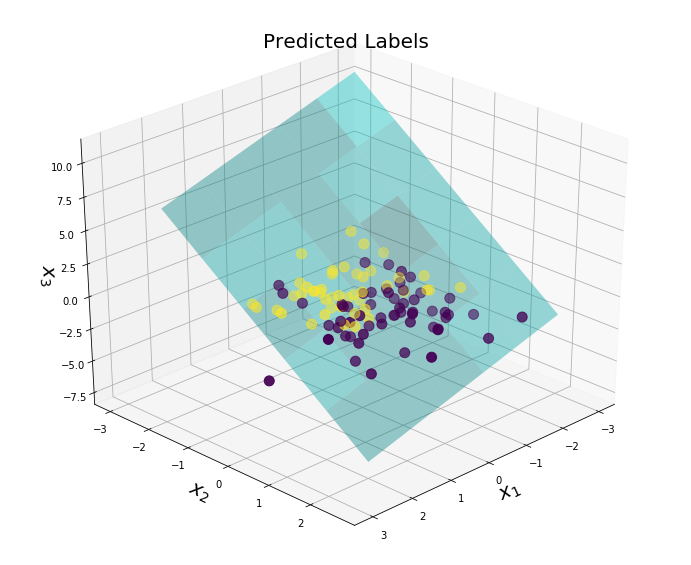

In [77]:

fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(test.x1, test.x2, test.x3, s = 100,  c = test.y)
# Scatter plot, "c" stands for color, and "s" determines the marker size

# # Generate coordinates for hyperplane
radius = 3
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = -(lr.intercept_[0] + lr.coef_[0][0] * x1 + lr.coef_[0][1]*x2) / lr.coef_[0][2]
ax.plot_surface(x1, x2, fit_y, color='c', alpha=0.4)


# # alpha (between 0 and 1) controls the transparency with 0 being totally transparent
# ax.plot_surface(x1, x2, fit_y, color='g', alpha = 0.3)
# Set labels and fontsize
ax.set_title('Predicted Labels', fontsize = 20)
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$x_3$', fontsize = 20)

ax.view_init(azim = 45)   # Controls the viewing angle

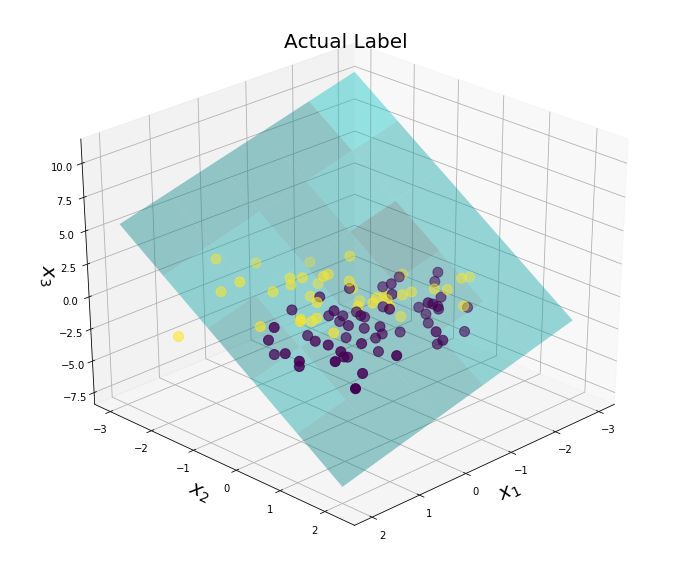

In [78]:
fig = plt.figure(figsize = (12,10))  # Create a plot with customized figure size (width, height)
ax = fig.gca(projection='3d')  # Extract the axis for further operations
ax.scatter(train.x1, train.x2, train.x3, s = 100,  c = train.y)
# Scatter plot, "c" stands for color, and "s" determines the marker size

# # Generate coordinates for hyperplane
radius = 3
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = -(lr.intercept_[0] + lr.coef_[0][0] * x1 + lr.coef_[0][1]*x2) / lr.coef_[0][2]
ax.plot_surface(x1, x2, fit_y, color='c', alpha=0.4)


# # alpha (between 0 and 1) controls the transparency with 0 being totally transparent
# ax.plot_surface(x1, x2, fit_y, color='g', alpha = 0.3)
# Set labels and fontsize
ax.set_title('Actual Label', fontsize = 20)
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$x_3$', fontsize = 20)

ax.view_init(azim = 45)   # Controls the viewing angle

## e)

In [80]:
TP = sum((pre==1)&(test.y==1))
FP = sum((pre==1)&(test.y==0))
FN = sum((pre==0)&(test.y==1))
TN = sum((pre==0)&(test.y==0))

Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)

print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 97.92%
Accuracy = 99.04%
Recall = 100.00%


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy
    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

## a)

In [84]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame(np.concatenate((Y.reshape(len(Y),1),X),axis=1))
data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


In [85]:
data_i.index

RangeIndex(start=0, stop=150, step=1)

## b)

In [86]:
lr = LogisticRegression(C=1e6)
lr.fit(X,Y)
lr

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## c)

In [87]:
pre = lr.predict(X)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## d)

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, pre)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

## e)

In [89]:
precision_0 = 100 * 50 / (50 + 0)
print('The precision with respect to the class labeled 0 is {:.2f}%'.format(precision_0))

The precision with respect to the class labeled 0 is 100.00%


In [90]:
TP = 50 + 48 + 49
FP = 2 + 1
TN = 0
FN = 0

Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
print("The model's overall accuracy is {:.2f}%".format(Acc))

The model's overall accuracy is 98.00%


## f)

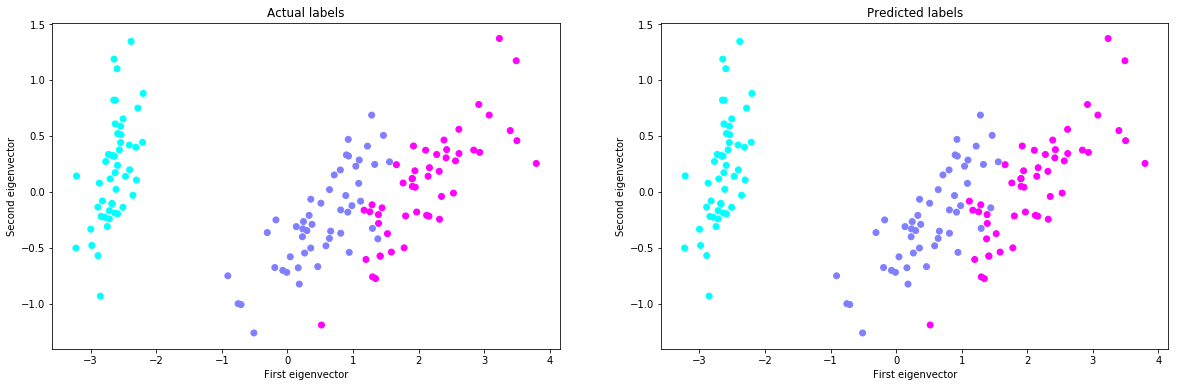

In [92]:
n=2 # how many eigenvectors we choose

pca = PCA(n)
Xproj = pca.fit_transform(X) #principle components, uncorrelated ones

fig4 = plt.figure(figsize=(20, 6))
fig4.clf()
ax41, ax42 = fig4.add_subplot(121), fig4.add_subplot(122)

# Plot the training points
ax41.scatter(Xproj[:, 0], Xproj[:, 1], c=Y, cmap=plt.cm.cool)
ax41.set_xlabel('First eigenvector')
ax41.set_ylabel('Second eigenvector')
ax41.set_title('Actual labels')

ax42.scatter(Xproj[:, 0], Xproj[:, 1], c=pre, cmap=plt.cm.cool)
ax42.set_xlabel('First eigenvector')
ax42.set_ylabel('Second eigenvector')
ax42.set_title('Predicted labels')

plt.show()